In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from scipy import stats
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams['font.family'] = font_family
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

data = pd.read_csv('20230715_quiz.csv', index_col=0)
data.head()

,sales,price,brand,category
1,9,2.603256,hazzys,accessories
2,12,4.703212,beanpole,accessories
3,8,3.649456,beanpole,accessories
4,12,5.346910,chanel,accessories
5,18,3.996329,louis vuitton,fashion


#### 상관분석

In [22]:
correlation = data[['price', 'sales']].corr()
print(f"전체 데이터 가격과 판매량 상관관계: {correlation.iloc[0, 1]:.2f}")

전체 데이터 가격과 판매량 상관관계: -0.28


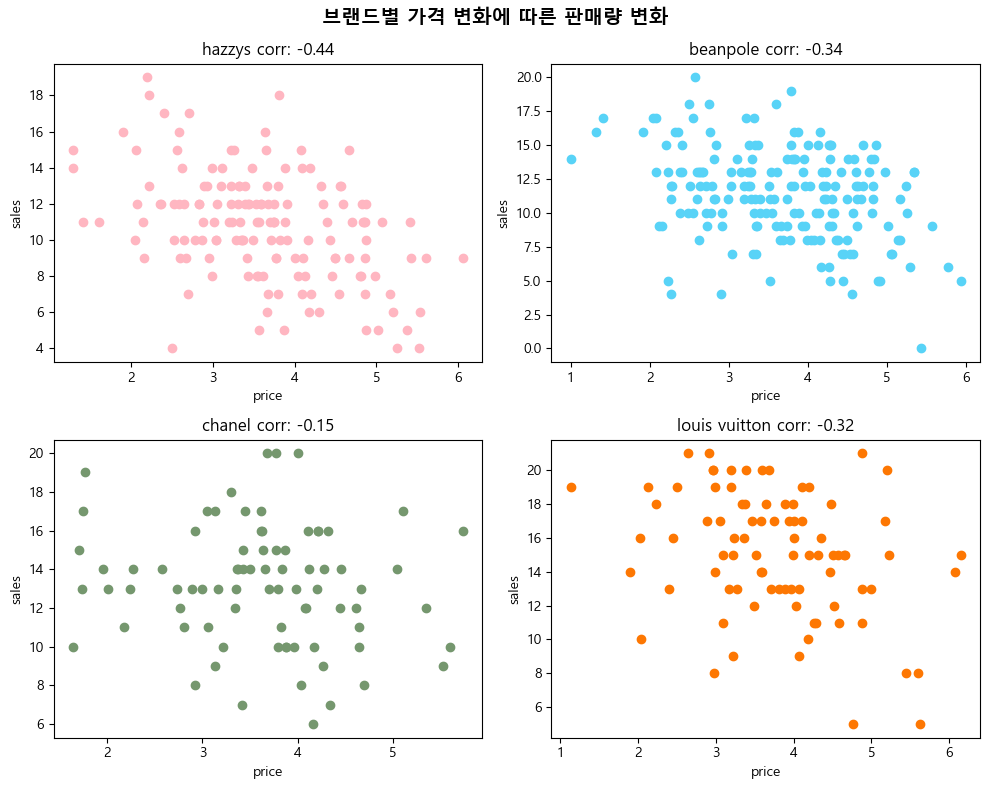

In [23]:
# 브랜드별 가격 변화에 따른 판매량 변화

brands = data['brand'].unique()
colors = ["#FFB6C1", "#58D3F7", "#75976e", "#FD7702"]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for i, brand in enumerate(brands):
    ax = axs[i // 2][i % 2]
    brand_data = data[data['brand'] == brand]
    ax.scatter(brand_data['price'], brand_data['sales'], marker='o', color=colors[i])
    ax.set_xlabel('price')
    ax.set_ylabel('sales')
    ax.set_title(f'{brand} corr: {brand_data[["price", "sales"]].corr().iloc[0, 1]:.2f}')

fig.suptitle("브랜드별 가격 변화에 따른 판매량 변화", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

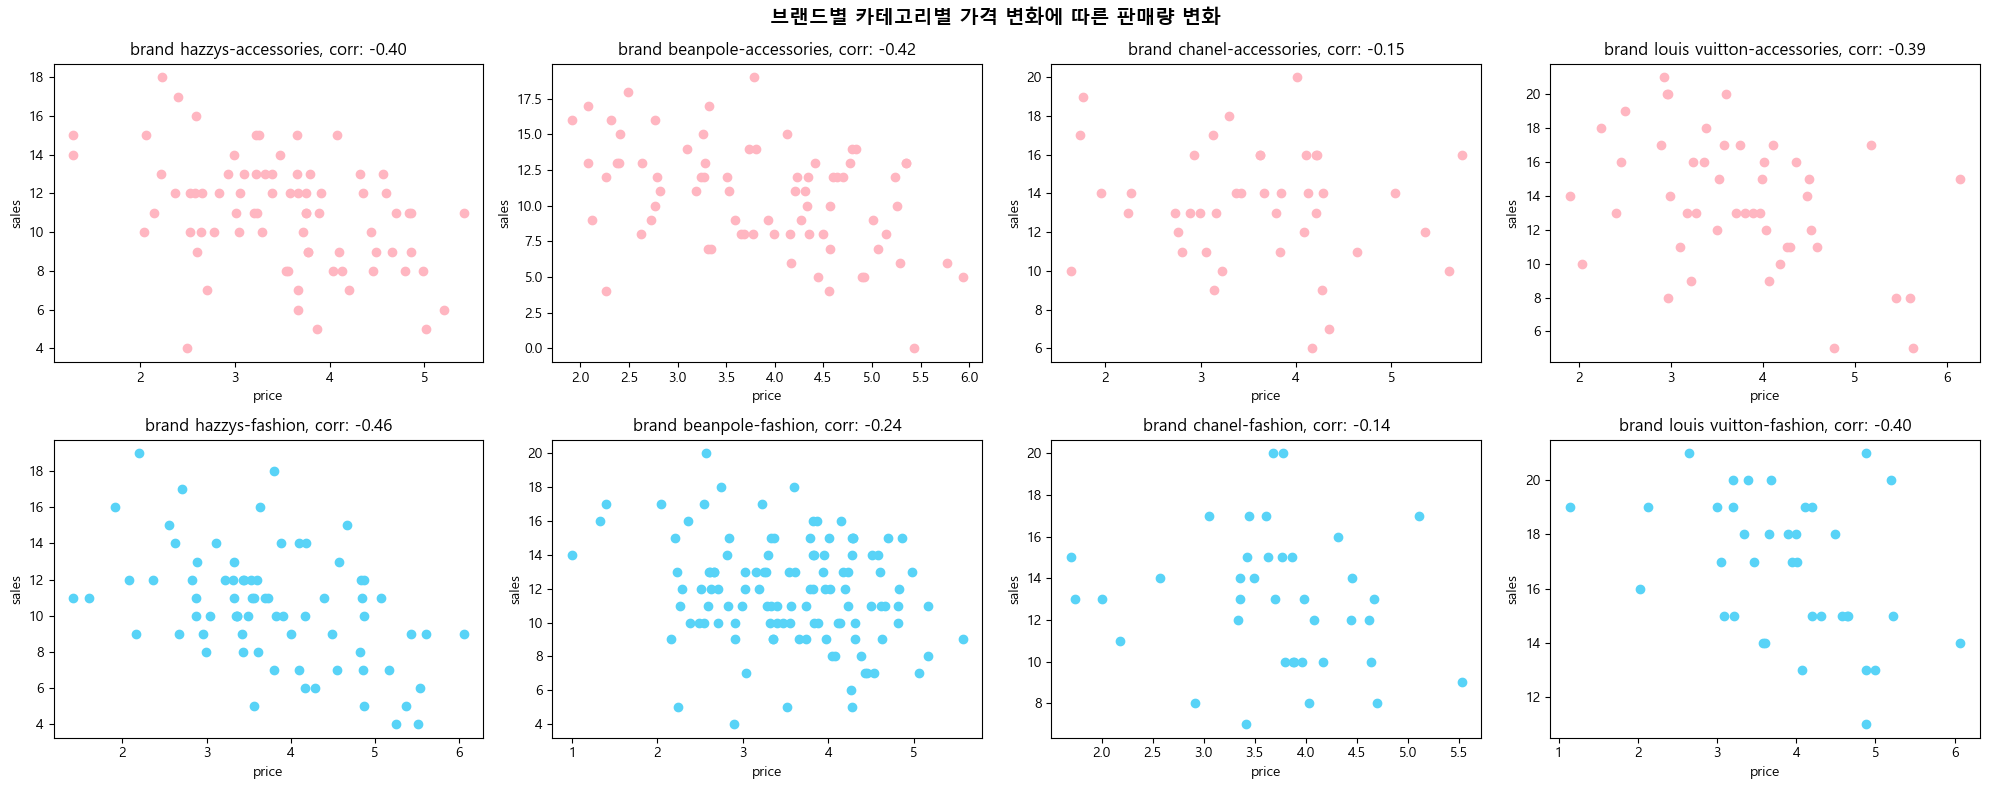

In [24]:
# 브랜드별 카테고리별 가격 변화에 따른 판매량 변화

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))

brands = data['brand'].unique()
categories = data['category'].unique()
colors = ["#FFB6C1", "#58D3F7"]

for i, brand in enumerate(brands):
    for j, category in enumerate(categories):
        ax = axs[j][i]
        brand_category_data = data[(data['brand'] == brand) & (data['category'] == category)]
        ax.scatter(brand_category_data['price'], brand_category_data['sales'], color=colors[j])
        ax.set_xlabel('price')
        ax.set_ylabel('sales')
        ax.set_title(f'brand {brand}-{category}, corr: {brand_category_data[["price", "sales"]].corr().iloc[0, 1]:.2f}')

fig.suptitle("브랜드별 카테고리별 가격 변화에 따른 판매량 변화", fontsize = 14, fontweight = 'bold')
plt.tight_layout()
plt.show()

#### 회귀분석

In [25]:
x = data['price'].to_numpy()
y = data['sales'].to_numpy()
p = 1

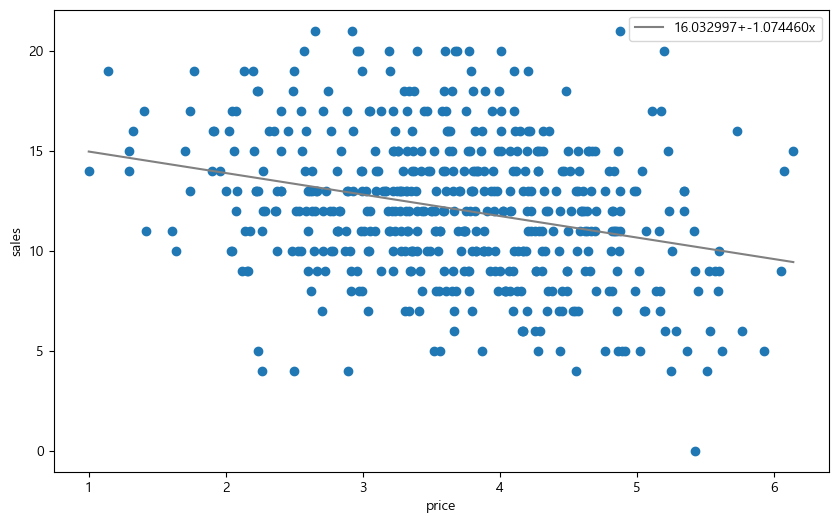

In [26]:
poly_fit = np.polyfit(x, y, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)
fig = plt.figure(figsize= (10,6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('price')
ax.set_ylabel('sales')
ax.plot(xs, ys, color='gray', label = f"{poly_fit[1]:2f}+{poly_fit[0]:2f}x")
ax.scatter(x, y)
ax.legend()

plt.show()

In [27]:
formula = 'sales ~ price'
result = smf.ols(formula, data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     43.70
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           9.85e-11
Time:                        11:49:45   Log-Likelihood:                -1331.9
No. Observations:                 500   AIC:                             2668.
Df Residuals:                     498   BIC:                             2676.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.0330      0.616     26.023      0.0

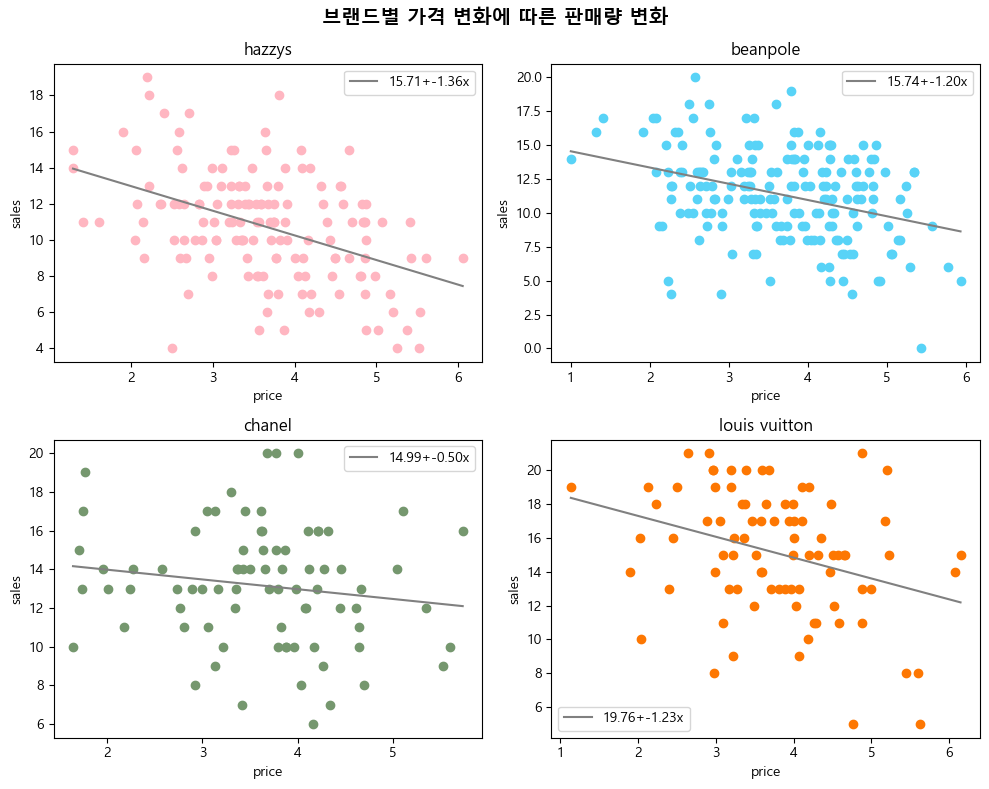

In [28]:
# 브랜드별 가격 변화에 따른 판매량 변화 

brands = data['brand'].unique()
colors = ["#FFB6C1", "#58D3F7", "#75976e", "#FD7702"]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for i, brand in enumerate(brands):
    brand_data = data[data['brand'] == brand]
    x = brand_data['price'].to_numpy() 
    y = brand_data['sales'].to_numpy()
    poly_fit = np.polyfit(x, y, 1)
    poly_1d = np.poly1d(poly_fit)   
    xs = np.linspace(x.min(), x.max())
    ys = poly_1d(xs)
    ax = axs[i // 2][i % 2]
    ax.set_xlabel('price')
    ax.set_ylabel('sales')
    ax.plot(xs, ys, color='gray', label = f"{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x")
    ax.scatter(x, y, color=colors[i])
    ax.set_title(brand)
    ax.legend()



fig.suptitle("브랜드별 가격 변화에 따른 판매량 변화", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [29]:
brands = data['brand'].unique()
all_result = {}

for brand in brands:
    brand_data = data[data['brand'] == brand]
    x = brand_data['price'].to_numpy()
    y = brand_data['sales'].to_numpy()
    formula = 'sales ~ price'
    result = smf.ols(formula, brand_data).fit()
    all_result[brand] = result.summary()


In [30]:
all_result['chanel']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.812
Date:                Mon, 17 Jul 2023   Prob (F-statistic):              0.182
Time:                        11:49:46   Log-Likelihood:                -202.59
No. Observations:                  80   AIC:                             409.2
Df Residuals:                      78   BIC:                             413.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.9850      1.397     10.724      0.000      12.203      17.767
price         -0.5036      0.374     -1.346      0.182      -1.248       0.241
==============================================================================
Omnibus:                        0.117   Durbin-Watson:                   2.516
Prob(Omnibus):                  0.943   Jarque-Bera (JB):                0.283
Skew:                           0.062   Prob(JB):                        0.868
Kurtosis:                       2.737   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
p_value = all_result['chanel'].tables[1].data[2][4]
p_value

' 0.182'

In [32]:
brands = data['brand'].unique()

for brand in brands:
    p_value = float(all_result[brand].tables[1].data[2][4])
    if p_value >= 0.05:
        print(f"{brand}: 유의하지 않다")
    else:
        print(f"{brand}: 유의하다") 

hazzys: 유의하다
beanpole: 유의하다
chanel: 유의하지 않다
louis vuitton: 유의하다


In [33]:
all_result['hazzys']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     35.34
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           1.93e-08
Time:                        11:49:46   Log-Likelihood:                -358.86
No. Observations:                 149   AIC:                             721.7
Df Residuals:                     147   BIC:                             727.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.7096      0.862     18.225      0.000      14.006      17.413
price         -1.3641      0.229     -5.944      0.000      -1.818      -0.911
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.015
Skew:                           0.024   Prob(JB):                        0.993
Kurtosis:                       2.994   Cond. No.                         15.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
all_result['beanpole']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     24.39
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           1.75e-06
Time:                        11:49:46   Log-Likelihood:                -480.89
No. Observations:                 187   AIC:                             965.8
Df Residuals:                     185   BIC:                             972.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.7420      0.920     17.115      0.000      13.927      17.557
price         -1.1987      0.243     -4.939      0.000      -1.678      -0.720
==============================================================================
Omnibus:                        1.821   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.402   Jarque-Bera (JB):                1.708
Skew:                          -0.234   Prob(JB):                        0.426
Kurtosis:                       2.978   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
all_result['louis vuitton']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     9.620
Date:                Mon, 17 Jul 2023   Prob (F-statistic):            0.00264
Time:                        11:49:46   Log-Likelihood:                -223.37
No. Observations:                  84   AIC:                             450.7
Df Residuals:                      82   BIC:                             455.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.7633      1.553     12.729      0.000      16.675      22.852
price         -1.2330      0.398     -3.102      0.003      -2.024      -0.442
==============================================================================
Omnibus:                        3.053   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.217   Jarque-Bera (JB):                2.985
Skew:                          -0.449   Prob(JB):                        0.225
Kurtosis:                       2.786   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

category를 더미변수로 모형에 추가

In [36]:
brands = data['brand'].unique()
all_result = {}

for brand in brands:
    brand_data = data[data['brand'] == brand]
    brand_data = pd.get_dummies(brand_data, columns=['category'])
    formula = 'sales ~ price + category_accessories + category_fashion'
    result = smf.ols(formula, brand_data).fit()
    all_result[brand] = result.summary()

In [37]:
all_result['beanpole']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     13.70
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           2.85e-06
Time:                        11:49:46   Log-Likelihood:                -479.50
No. Observations:                 187   AIC:                             965.0
Df Residuals:                     184   BIC:                             974.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.2886      0.623     16.523      0.000       9.060      11.517
price                   -1.1383      0.244     -4.660      0.000      -1.620      -0.656
category_accessories     4.7447      0.429     11.050      0.000       3.898       5.592
category_fashion         5.5440      0.353     15.689      0.000       4.847       6.241
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.539   Jarque-Bera (JB):                1.172
Skew:                          -0.193   Prob(JB):                        0.557
Kurtosis:                       2.957   Cond. No.                     3.48e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.44e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
all_result['hazzys']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     17.61
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           1.41e-07
Time:                        11:49:46   Log-Likelihood:                -358.81
No. Observations:                 149   AIC:                             723.6
Df Residuals:                     146   BIC:                             732.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.4485      0.582     17.960      0.000       9.299      11.598
price                   -1.3543      0.232     -5.830      0.000      -1.813      -0.895
category_accessories     5.2943      0.343     15.453      0.000       4.617       5.971
category_fashion         5.1541      0.391     13.187      0.000       4.382       5.927
==============================================================================
Omnibus:                        0.161   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.923   Jarque-Bera (JB):                0.032
Skew:                           0.031   Prob(JB):                        0.984
Kurtosis:                       3.037   Cond. No.                     2.06e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.46e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
all_result['louis vuitton']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     17.11
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           6.36e-07
Time:                        11:49:46   Log-Likelihood:                -213.23
No. Observations:                  84   AIC:                             432.5
Df Residuals:                      81   BIC:                             439.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               13.5716      0.927     14.642      0.000      11.727      15.416
price                   -1.3391      0.355     -3.770      0.000      -2.046      -0.632
category_accessories     5.1705      0.551      9.380      0.000       4.074       6.267
category_fashion         8.4012      0.601     13.968      0.000       7.204       9.598
==============================================================================
Omnibus:                        0.635   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.728   Jarque-Bera (JB):                0.745
Skew:                          -0.091   Prob(JB):                        0.689
Kurtosis:                       2.576   Cond. No.                     2.81e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.77e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

카테고리 변수 그 자체만으로는 영향 미미

In [40]:
category_dummies = pd.get_dummies(data, columns = ['category'])

formula = 'sales ~ category_accessories + category_fashion'
result = smf.ols(formula, category_dummies).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.979
Date:                Mon, 17 Jul 2023   Prob (F-statistic):              0.160
Time:                        11:49:46   Log-Likelihood:                -1351.9
No. Observations:                 500   AIC:                             2708.
Df Residuals:                     498   BIC:                             2716.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                8.0540 